# Scan 3 Analysis

Tarama sonuçlarının incelenmesi ve grafikler:

## Codes . . .

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted

In [2]:
df = pd.read_csv("results.csv")
df = df.drop_duplicates()

In [3]:
print(df.columns)
df.head()

Index(['scanner', 'period', 'imagetype', 'image', 'imgname', 'imgtag', 'id',
       'pkgname', 'pkgversion', 'severity', 'score', 'fixstatus'],
      dtype='object')


,scanner,period,imagetype,image,imgname,imgtag,id,pkgname,pkgversion,severity,score,fixstatus
0,trivy,2023_01,library,library/postgres:15.0,library/postgres,15.0,CVE-2011-3374,apt,2.2.4,low,3.7,not-fixed
1,trivy,2023_01,library,library/postgres:15.0,library/postgres,15.0,CVE-2022-3715,bash,5.1-2+deb11u1,high,7.8,not-fixed
2,trivy,2023_01,library,library/postgres:15.0,library/postgres,15.0,CVE-2022-0563,bsdutils,1:2.36.1-8+deb11u1,low,5.5,not-fixed
3,trivy,2023_01,library,library/postgres:15.0,library/postgres,15.0,CVE-2016-2781,coreutils,8.32-4+b1,low,6.5,wont-fix
4,trivy,2023_01,library,library/postgres:15.0,library/postgres,15.0,CVE-2017-18018,coreutils,8.32-4+b1,low,4.7,not-fixed


In [4]:
# df['cveyear'] = df['id'].str[4:8]
def extract_cve_year(cveid):
  return cveid[4:8] if cveid.startswith("CVE-") else None
df['cveyear'] = df['id'].apply(extract_cve_year)

In [5]:
_custom_dict = {'critical': 4, 'high': 3, 'medium': 2, 'low': 1} 
_df_sorted = df.sort_values(by='severity', ascending=True, key=lambda x: x.map(_custom_dict))
dfnt = _df_sorted.drop_duplicates(
    subset=['period', 'imagetype', 'image', 'imgname', 'imgtag', 'id', 'pkgname', 'pkgversion'], keep='last'
).sort_values(by=["period", "severity"])
#[['period', 'imagetype', 'image', 'imgname', 'imgtag', 'id', 'pkgname', 'pkgversion', 'severity']]
dfnt

,scanner,period,imagetype,image,imgname,imgtag,id,pkgname,pkgversion,severity,score,fixstatus,cveyear
7286,trivy,2023_01,library,library/mediawiki:1.39.0,library/mediawiki,1.39.0,CVE-2021-29921,libpython3.9-stdlib,3.9.2-1,critical,9.8,not-fixed,2021
324181,grype,2023_01,opensource,linuxserver/syncthing:1.22.2,linuxserver/syncthing,1.22.2,CVE-2023-24538,stdlib,go1.18.7,critical,9.8,not-fixed,2023
324180,grype,2023_01,opensource,linuxserver/syncthing:1.22.2,linuxserver/syncthing,1.22.2,CVE-2023-24540,stdlib,go1.18.7,critical,9.8,not-fixed,2023
22797,trivy,2023_01,library,library/haxe:4.2.4,library/haxe,4.2.4,CVE-2022-1587,libpcre2-8-0,10.36-2,critical,9.1,fixed,2022
22796,trivy,2023_01,library,library/haxe:4.2.4,library/haxe,4.2.4,CVE-2022-1586,libpcre2-8-0,10.36-2,critical,9.1,fixed,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
889348,trivy,2024_01,library,library/nextcloud:latest,library/nextcloud,latest,CVE-2023-45802,apache2-data,2.4.57-2,medium,5.9,not-fixed,2023
889337,trivy,2024_01,library,library/nextcloud:latest,library/nextcloud,latest,CVE-2023-45802,apache2-bin,2.4.57-2,medium,5.9,not-fixed,2023
1112853,snyk,2024_01,verified,google/cloud-sdk:latest,google/cloud-sdk,latest,CVE-2021-3733,python2.7,2.7.18-8+deb11u1,medium,6.5,not-fixed,2021
1112856,snyk,2024_01,verified,google/cloud-sdk:latest,google/cloud-sdk,latest,CVE-2023-27043,python2.7,2.7.18-8+deb11u1,medium,5.3,not-fixed,2023


In [6]:
p2301 = df[df["period"] == "2023_01"]
p2307 = df[df["period"] == "2023_07"]
p2401 = df[df["period"] == "2024_01"]

trivy_vulns = df[df["scanner"] == "trivy"]
grype_vulns = df[df["scanner"] == "grype"]
snyk_vulns = df[df["scanner"] == "snyk"]

p2301nt = dfnt[dfnt["period"] == "2023_01"]
p2307nt = dfnt[dfnt["period"] == "2023_07"]
p2401nt = dfnt[dfnt["period"] == "2024_01"]

In [7]:
def yuzde(x: int, y: int) -> float:
    return round(x * 100 / y, 2)
def yuzde_fark(x: int, y: int) -> float:
    return round(x * 100 / y, 2) - 100.0
yuzde(24, 12)
yuzde_fark(24, 12)

100.0

## Tests

In [8]:
p2401nt[p2401nt["imgname"] == "library/python"].drop_duplicates()

,scanner,period,imagetype,image,imgname,imgtag,id,pkgname,pkgversion,severity,score,fixstatus,cveyear
938454,grype,2024_01,library,library/python:latest,library/python,latest,CVE-2023-5841,openexr,3.1.5-5,critical,9.1,wont-fix,2023
938300,grype,2024_01,library,library/python:latest,library/python,latest,CVE-2023-6879,aom,3.6.0-1,critical,9.8,wont-fix,2023
911232,trivy,2024_01,library,library/python:latest,library/python,latest,CVE-2023-45853,zlib1g-dev,1:1.2.13.dfsg-1,critical,9.8,wont-fix,2023
911231,trivy,2024_01,library,library/python:latest,library/python,latest,CVE-2023-45853,zlib1g,1:1.2.13.dfsg-1,critical,9.8,wont-fix,2023
910521,trivy,2024_01,library,library/python:latest,library/python,latest,CVE-2023-6879,libaom3,3.6.0-1,critical,9.8,not-fixed,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
910467,trivy,2024_01,library,library/python:latest,library/python,latest,CVE-2023-1906,imagemagick,8:6.9.11.60+dfsg-1.6,medium,5.5,fixed,2023
910433,trivy,2024_01,library,library/python:latest,library/python,latest,CVE-2023-4039,cpp-12,12.2.0-14,medium,4.8,not-fixed,2023
910436,trivy,2024_01,library,library/python:latest,library/python,latest,CVE-2023-4039,g++-12,12.2.0-14,medium,4.8,not-fixed,2023
910438,trivy,2024_01,library,library/python:latest,library/python,latest,CVE-2023-4039,gcc-12,12.2.0-14,medium,4.8,not-fixed,2023


In [9]:
# https://github.com/aquasecurity/trivy/issues/1879
df[(df["image"] == "google/cloud-sdk:latest") & (df["id"] == "CVE-2017-9117")]

,scanner,period,imagetype,image,imgname,imgtag,id,pkgname,pkgversion,severity,score,fixstatus,cveyear
1060467,trivy,2024_01,verified,google/cloud-sdk:latest,google/cloud-sdk,latest,CVE-2017-9117,libtiff5,4.2.0-1+deb11u5,low,9.8,not-fixed,2017
1113268,snyk,2024_01,verified,google/cloud-sdk:latest,google/cloud-sdk,latest,CVE-2017-9117,tiff,4.2.0-1+deb11u5,low,9.8,not-fixed,2017


In [10]:
_dfnt_imgname = dfnt["imgname"].drop_duplicates()
_dfnt_imgname
p2401nt[p2401nt["severity"] == "critical"]["imgname"].drop_duplicates()
p2307nt[p2307nt["severity"] == "critical"]["imgname"].drop_duplicates()
p2301nt[p2301nt["severity"] == "critical"]["imgname"].drop_duplicates()

# p2401nt[p2401nt["severity"] == "high"]["imgname"].drop_duplicates()
# p2307nt[p2307nt["severity"] == "high"]["imgname"].drop_duplicates()
# p2301nt[p2301nt["severity"] == "high"]["imgname"].drop_duplicates()

7286                       library/mediawiki
324181                 linuxserver/syncthing
22797                           library/haxe
311177                 linuxserver/nextcloud
51495                          library/storm
                         ...                
418444      rancher/mirrored-coredns-coredns
10014                             library/sl
418712                     docker/dockerfile
418814    kong/kubernetes-ingress-controller
18866                         library/groovy
Name: imgname, Length: 306, dtype: object

In [26]:
_osimgs = dfnt.groupby(["imgname", "period"]).size().reset_index(name="Count")
pivot_df = _osimgs.pivot(index=['imgname'], columns='period', values='Count')
pivot_df = pivot_df[["2023_01", "2023_07", "2024_01"]].fillna(0.0).astype(int).reset_index()
pivot_df = pivot_df.sort_values(by="2024_01", ascending=False).head(10)#[["imgname", "2023_01", "2023_07", "2024_01"]]
print(pivot_df.to_latex())

\begin{tabular}{llrrr}
\toprule
period & imgname & 2023_01 & 2023_07 & 2024_01 \\
\midrule
13 & atlassian/default-image & 1621 & 1266 & 4373 \\
57 & circleci/python & 4834 & 4834 & 3987 \\
345 & redash/redash & 2526 & 2526 & 3878 \\
169 & library/hipache & 3577 & 3577 & 3578 \\
55 & circleci/openjdk & 3199 & 3199 & 3367 \\
210 & library/owncloud & 2295 & 2295 & 2313 \\
167 & library/haskell & 3433 & 2266 & 1866 \\
237 & library/sl & 1190 & 1190 & 1721 \\
220 & library/pypy & 2532 & 2022 & 1445 \\
52 & cimg/python & 2479 & 2039 & 1357 \\
\bottomrule
\end{tabular}



In [12]:
_sevmgs = dfnt.groupby(["imgname", "period", "severity"]).size().reset_index(name="Count")
_pivot_df = _sevmgs.pivot(index='imgname', columns='period', values='Count')
_pivot_df = _pivot_df[["2023_01", "2023_07", "2024_01"]].fillna(0.0).astype(int).reset_index()
_pivot_df

ValueError: Index contains duplicate entries, cannot reshape

## Periyod Değişimleri Basit

Periodlarda tespit edilen zafiyetlerin toplamı. Bu grafik bütün tarama araçlarına ait zafiyetleri içerir.

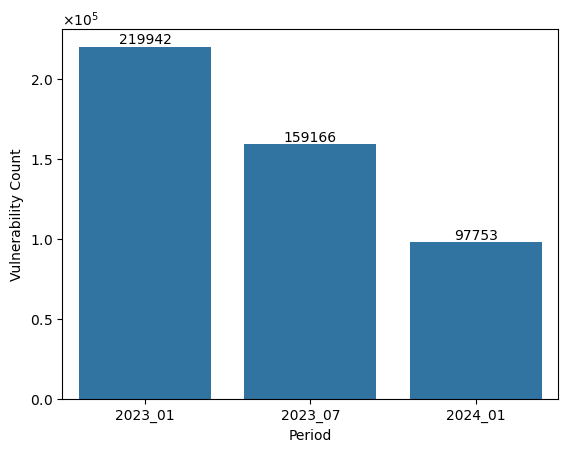

In [ ]:
# img: detected-vulns-by-period
_ax = sns.countplot(dfnt, x="period")
_ax.set_xlabel("Period")
_ax.set_ylabel("Vulnerability Count")
_ax.bar_label(_ax.containers[0])

# Set the y-axis tick label style to scientific notation
plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

In [ ]:
print("p2/p3", yuzde(159_166, 97_753), "p1/p3", yuzde(219_942, 97_753))

p2/p3 162.82 p1/p3 225.0


[Text(0, 0, '8097'), Text(0, 0, '7471'), Text(0, 0, '6959')]

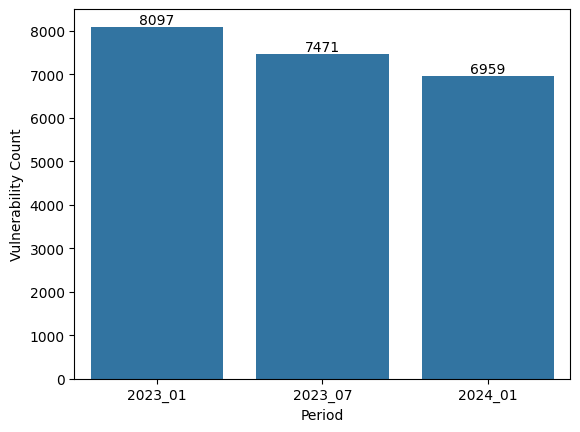

In [ ]:
# img: detected-uniq-vulns-by-period
_ax = sns.countplot(df[["id", "period"]].drop_duplicates(), x="period")
_ax.set_ylabel("Vulnerability Count")
_ax.set_xlabel("Period")
_ax.bar_label(_ax.containers[0])

Tüm araçlara ait tespit edilen zafiyetlerin severity-period dağılımı.

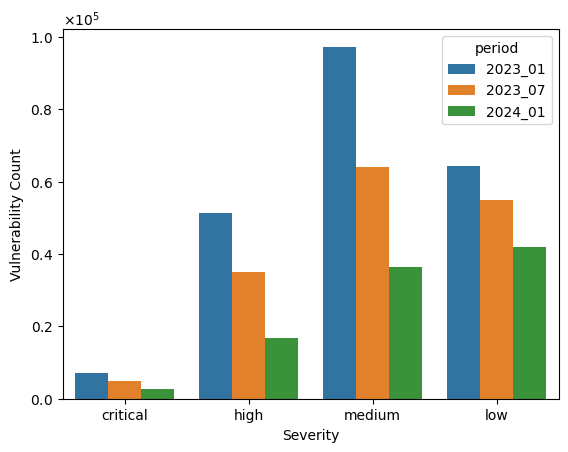

In [ ]:
_ax = sns.countplot(dfnt, x="severity", hue="period", order=["critical", "high", "medium", "low"])
_ax.set_ylabel("Vulnerability Count")
_ax.set_xlabel("Severity")
# for _c in _ax.containers: print(_ax.bar_label(_c))

# Set the y-axis tick label style to scientific notation
plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

In [ ]:
print("critical", "p2/p3", yuzde(4943, 2746), "p1/p3", yuzde(6993, 2746))
print("high", "p2/p3", yuzde(35110, 16728), "p1/p3", yuzde(51442, 16728))
print("medium", "p2/p3", yuzde(64094, 36477), "p1/p3", yuzde(97244, 36477))

critical p2/p3 180.01 p1/p3 254.66
high p2/p3 209.89 p1/p3 307.52
medium p2/p3 175.71 p1/p3 266.59


Tarama araçlarının periyot içerisindeki dağılımları.

<Axes: xlabel='scanner', ylabel='count'>

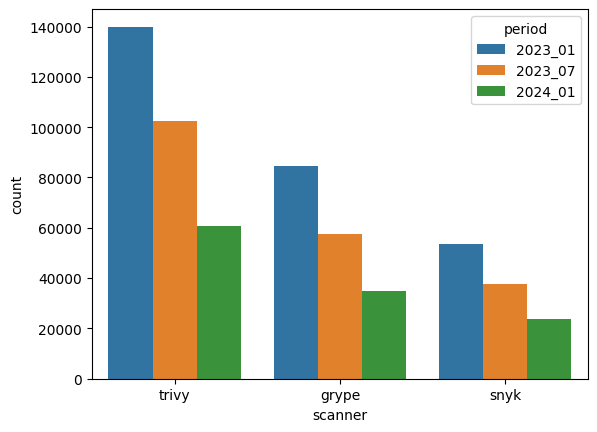

In [ ]:
sns.countplot(df, x="scanner", hue="period")

Periodlarda tespit edilen zafiyetlerin toplamı. Bu grafik bütün tarama araçlarına ait zafiyetleri içerir.

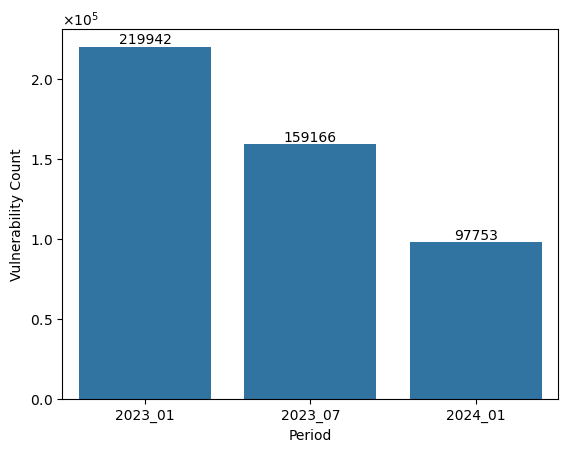

In [ ]:
# img: detected-vulns-by-period
_ax = sns.countplot(dfnt, x="period")
_ax.set_xlabel("Period")
_ax.set_ylabel("Vulnerability Count")
_ax.bar_label(_ax.containers[0])

# Set the y-axis tick label style to scientific notation
plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

In [ ]:
print("p2/p3", yuzde(159_166, 97_753), "p1/p3", yuzde(219_942, 97_753))

p2/p3 162.82 p1/p3 225.0


[Text(0, 0, '8097'), Text(0, 0, '7471'), Text(0, 0, '6959')]

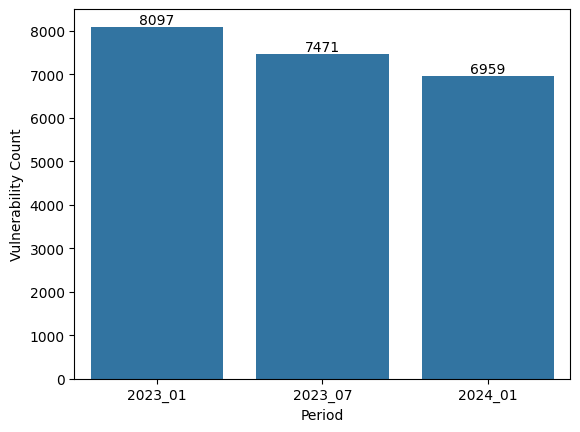

In [ ]:
# img: detected-uniq-vulns-by-period
_ax = sns.countplot(df[["id", "period"]].drop_duplicates(), x="period")
_ax.set_ylabel("Vulnerability Count")
_ax.set_xlabel("Period")
_ax.bar_label(_ax.containers[0])

Tüm araçlara ait tespit edilen zafiyetlerin severity-period dağılımı.

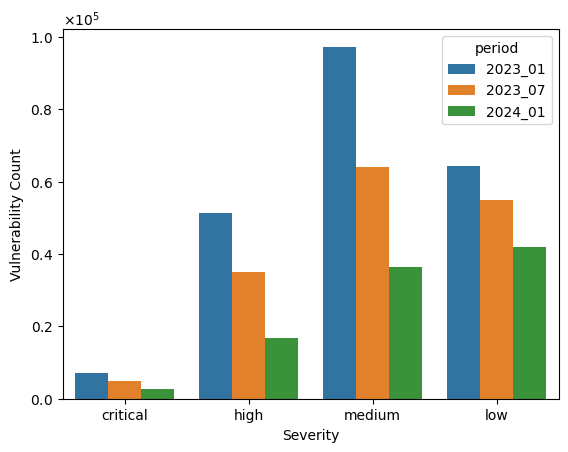

In [ ]:
_ax = sns.countplot(dfnt, x="severity", hue="period", order=["critical", "high", "medium", "low"])
_ax.set_ylabel("Vulnerability Count")
_ax.set_xlabel("Severity")
# for _c in _ax.containers: print(_ax.bar_label(_c))

# Set the y-axis tick label style to scientific notation
plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

In [ ]:
print("critical", "p2/p3", yuzde(4943, 2746), "p1/p3", yuzde(6993, 2746))
print("high", "p2/p3", yuzde(35110, 16728), "p1/p3", yuzde(51442, 16728))
print("medium", "p2/p3", yuzde(64094, 36477), "p1/p3", yuzde(97244, 36477))

critical p2/p3 180.01 p1/p3 254.66
high p2/p3 209.89 p1/p3 307.52
medium p2/p3 175.71 p1/p3 266.59


Tarama araçlarının periyot içerisindeki dağılımları.

<Axes: xlabel='scanner', ylabel='count'>

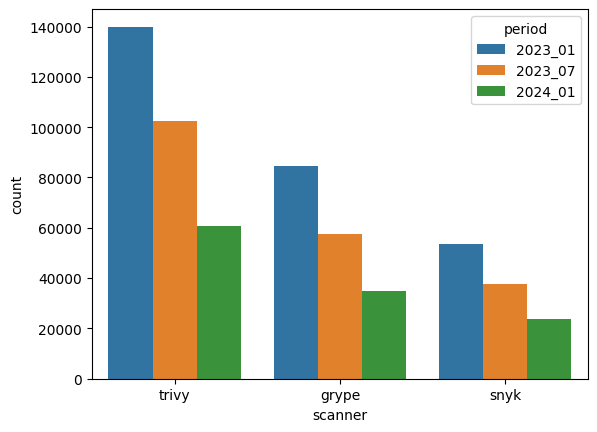

In [ ]:
sns.countplot(df, x="scanner", hue="period")

Periodlarda tespit edilen zafiyetlerin toplamı. Bu grafik bütün tarama araçlarına ait zafiyetleri içerir.

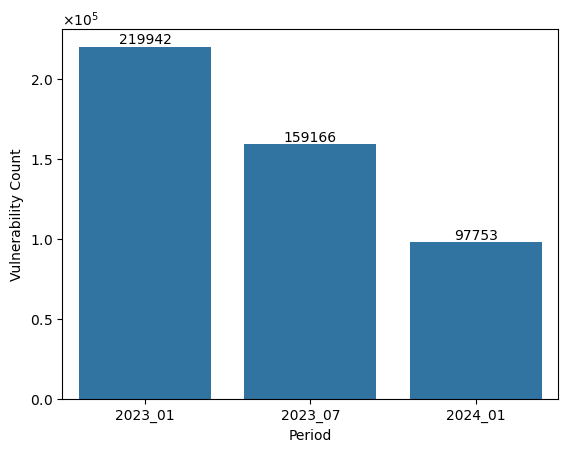

In [ ]:
# img: detected-vulns-by-period
_ax = sns.countplot(dfnt, x="period")
_ax.set_xlabel("Period")
_ax.set_ylabel("Vulnerability Count")
_ax.bar_label(_ax.containers[0])

# Set the y-axis tick label style to scientific notation
plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

In [ ]:
print("p2/p3", yuzde(159_166, 97_753), "p1/p3", yuzde(219_942, 97_753))

p2/p3 162.82 p1/p3 225.0


[Text(0, 0, '8097'), Text(0, 0, '7471'), Text(0, 0, '6959')]

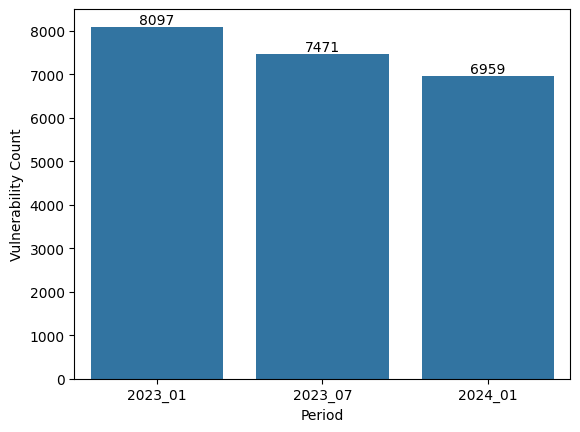

In [ ]:
# img: detected-uniq-vulns-by-period
_ax = sns.countplot(df[["id", "period"]].drop_duplicates(), x="period")
_ax.set_ylabel("Vulnerability Count")
_ax.set_xlabel("Period")
_ax.bar_label(_ax.containers[0])

Tüm araçlara ait tespit edilen zafiyetlerin severity-period dağılımı.

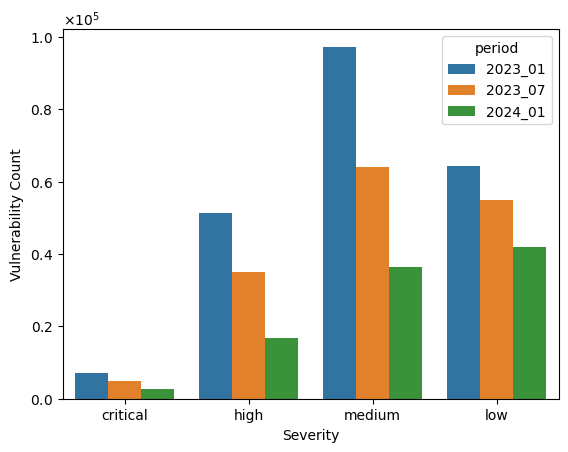

In [ ]:
_ax = sns.countplot(dfnt, x="severity", hue="period", order=["critical", "high", "medium", "low"])
_ax.set_ylabel("Vulnerability Count")
_ax.set_xlabel("Severity")
# for _c in _ax.containers: print(_ax.bar_label(_c))

# Set the y-axis tick label style to scientific notation
plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

In [ ]:
print("critical", "p2/p3", yuzde(4943, 2746), "p1/p3", yuzde(6993, 2746))
print("high", "p2/p3", yuzde(35110, 16728), "p1/p3", yuzde(51442, 16728))
print("medium", "p2/p3", yuzde(64094, 36477), "p1/p3", yuzde(97244, 36477))

critical p2/p3 180.01 p1/p3 254.66
high p2/p3 209.89 p1/p3 307.52
medium p2/p3 175.71 p1/p3 266.59


Tarama araçlarının periyot içerisindeki dağılımları.

<Axes: xlabel='scanner', ylabel='count'>

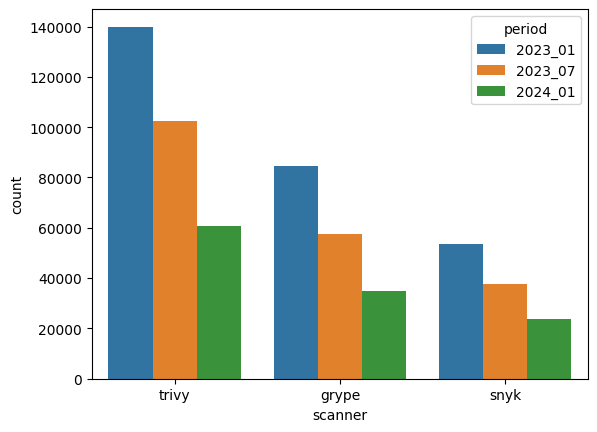

In [ ]:
sns.countplot(df, x="scanner", hue="period")

## Basit Tablolar

In [ ]:
_p1vulns = p2301nt['image'].value_counts().to_frame().head(10)
_p1vulns

,count
image,
circleci/python:3.9.9-buster,4834
apache/superset:2.0.1,3731
library/hipache:0.3.1,3577
library/haskell:9.4.3,3433
library/gazebo:libgazebo10-bionic,3250
circleci/openjdk:17-buster,3199
library/perl:5.30.3,3170
library/elixir:1.14.1,3059
library/gcc:12.1.0,2978


In [ ]:
print(_p1vulns.to_latex())

\begin{tabular}{lr}
\toprule
 & count \\
image &  \\
\midrule
circleci/python:3.9.9-buster & 4834 \\
apache/superset:2.0.1 & 3731 \\
library/hipache:0.3.1 & 3577 \\
library/haskell:9.4.3 & 3433 \\
library/gazebo:libgazebo10-bionic & 3250 \\
circleci/openjdk:17-buster & 3199 \\
library/perl:5.30.3 & 3170 \\
library/elixir:1.14.1 & 3059 \\
library/gcc:12.1.0 & 2978 \\
cimg/ruby:3.2.0 & 2917 \\
\bottomrule
\end{tabular}



In [ ]:
_p2vulns = p2307nt['image'].value_counts().to_frame().head(10)
_p2vulns

,count
image,
circleci/python:3.9.9-buster,4834
library/hipache:0.3.1,3577
circleci/openjdk:17-buster,3199
library/ros:rolling-ros1-bridge,2917
library/silverpeas:6.2.3,2808
cimg/ruby:3.2.1,2574
redash/redash:10.1.0.b50633,2526
library/owncloud:9.1.8,2295
library/haskell:9.2.7,2266


In [ ]:
print(_p2vulns.to_latex())

\begin{tabular}{lr}
\toprule
 & count \\
image &  \\
\midrule
circleci/python:3.9.9-buster & 4834 \\
library/hipache:0.3.1 & 3577 \\
circleci/openjdk:17-buster & 3199 \\
library/ros:rolling-ros1-bridge & 2917 \\
library/silverpeas:6.2.3 & 2808 \\
cimg/ruby:3.2.1 & 2574 \\
redash/redash:10.1.0.b50633 & 2526 \\
library/owncloud:9.1.8 & 2295 \\
library/haskell:9.2.7 & 2266 \\
library/elixir:1.15.0 & 2211 \\
\bottomrule
\end{tabular}



In [ ]:
_p3vulns = p2401nt['image'].value_counts().to_frame().head(10)
_p3vulns

,count
image,
atlassian/default-image:latest,4373
circleci/python:latest,3987
redash/redash:latest,3878
library/hipache:latest,3578
circleci/openjdk:latest,3367
library/owncloud:latest,2313
library/haskell:latest,1866
library/sl:latest,1721
library/pypy:latest,1445


In [ ]:
print(_p3vulns.to_latex())

\begin{tabular}{lr}
\toprule
 & count \\
image &  \\
\midrule
atlassian/default-image:latest & 4373 \\
circleci/python:latest & 3987 \\
redash/redash:latest & 3878 \\
library/hipache:latest & 3578 \\
circleci/openjdk:latest & 3367 \\
library/owncloud:latest & 2313 \\
library/haskell:latest & 1866 \\
library/sl:latest & 1721 \\
library/pypy:latest & 1445 \\
cimg/python:3.12.1 & 1357 \\
\bottomrule
\end{tabular}



Periyotlara göre araçların tespit ettikleri zafiyetlerin saysı tablo.

In [ ]:
# df.groupby(['period', "scanner"])['id'].agg(pd.Series.count).to_frame()
df.groupby(['period', "scanner"])['id'].count().to_frame()

id
period  scanner        
2023_01 grype     84680
        snyk      53746
        trivy    139917
2023_07 grype     57530
        snyk      37673
        trivy    102397
2024_01 grype     34749
        snyk      23791
        trivy     60786

## En eski cve ler table

En eski zafiyetlerin listesi 1999 dan kalan zafiyet de nasıl oluyor.

NOTE: research question: 10-20 yıllık CVE lerin kritiklik seviyelerine göre dağılımları nasıldır.

In [ ]:
df.sort_values(by=["id"])[["id"]].drop_duplicates().head(20)

,id
1061799,CVE-1999-0236
944535,CVE-1999-0678
822160,CVE-1999-1237
1015741,CVE-1999-1412
553849,CVE-2001-1534
384962,CVE-2002-1976
1014380,CVE-2002-2439
553872,CVE-2003-1307
916930,CVE-2003-1580
239705,CVE-2003-1581


In [ ]:
# dfnt.sort_values(by=["id"])[["id", ""]].drop_duplicates().head(10)
_oldest_cves = dfnt[["id"]].sort_values(by=["id"]).groupby(["id"]).size().reset_index(name='Vuln Count').head(20)
_oldest_cves

,id,Vuln Count
0,CVE-1999-0236,14
1,CVE-1999-0678,12
2,CVE-1999-1237,14
3,CVE-1999-1412,14
4,CVE-2001-1534,143
5,CVE-2002-1976,6
6,CVE-2002-2439,7
7,CVE-2003-1307,143
8,CVE-2003-1580,143
9,CVE-2003-1581,143


In [ ]:
print(_oldest_cves.to_latex())

\begin{tabular}{llr}
\toprule
 & id & Vuln Count \\
\midrule
0 & CVE-1999-0236 & 14 \\
1 & CVE-1999-0678 & 12 \\
2 & CVE-1999-1237 & 14 \\
3 & CVE-1999-1412 & 14 \\
4 & CVE-2001-1534 & 143 \\
5 & CVE-2002-1976 & 6 \\
6 & CVE-2002-2439 & 7 \\
7 & CVE-2003-1307 & 143 \\
8 & CVE-2003-1580 & 143 \\
9 & CVE-2003-1581 & 143 \\
10 & CVE-2004-0230 & 118 \\
11 & CVE-2004-0971 & 10 \\
12 & CVE-2005-0406 & 560 \\
13 & CVE-2005-1119 & 16 \\
14 & CVE-2005-2541 & 387 \\
15 & CVE-2005-3660 & 118 \\
16 & CVE-2006-20001 & 77 \\
17 & CVE-2007-0086 & 157 \\
18 & CVE-2007-0450 & 14 \\
19 & CVE-2007-1667 & 3 \\
\bottomrule
\end{tabular}



## Image Findings

Her imaj için 1. period 2. period 3. period zafiyet sayısını gösteren tablo

In [ ]:
dfnt.groupby(['imgname', "period"]).size().reset_index(name='Vuln Count')

,imgname,period,Vuln Count
0,adoptopenjdk/openjdk11,2023_01,253
1,adoptopenjdk/openjdk11,2023_07,137
2,adoptopenjdk/openjdk11,2024_01,39
3,amazon/aws-cli,2023_01,288
4,amazon/aws-cli,2023_07,128
...,...,...,...
1058,vaultwarden/server,2023_07,839
1059,vaultwarden/server,2024_01,358
1060,verdaccio/verdaccio,2023_01,113
1061,verdaccio/verdaccio,2023_07,59


## Periyodlara Göre Dağılımlar

Periyod ve tarama aracına göre dağılım.

[Text(0, 0, '60786'), Text(0, 0, '34749'), Text(0, 0, '23791')]

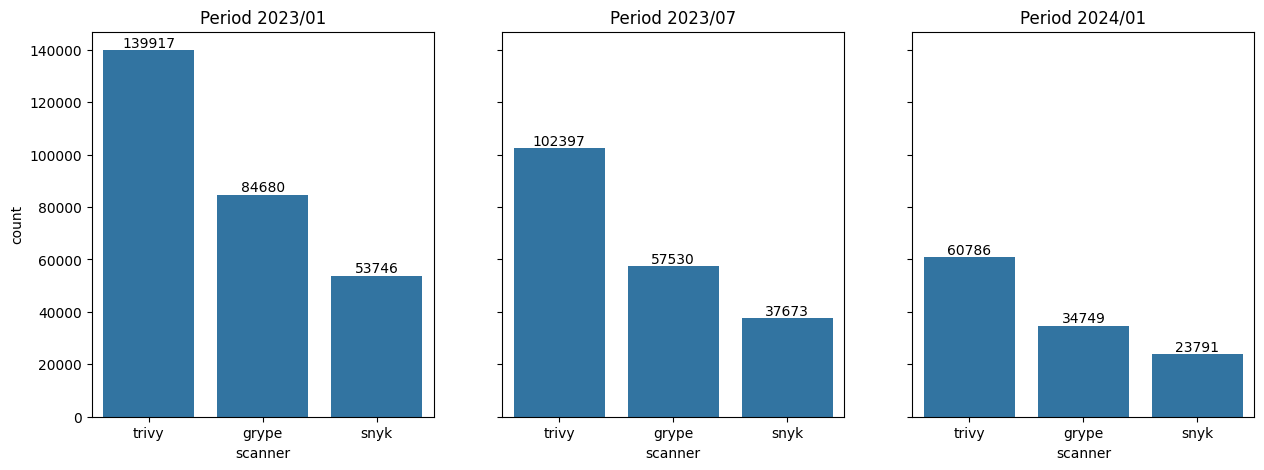

In [ ]:
_fig, _axs = plt.subplots(1,3, figsize=(15, 5), sharey=True)
_ax1 = sns.countplot(p2301, x="scanner", ax=_axs[0])
_ax1.set_title("Period 2023/01")
_ax1.bar_label(_ax1.containers[0])
_ax2 = sns.countplot(p2307, x="scanner", ax=_axs[1])
_ax2.set_title("Period 2023/07")
_ax2.bar_label(_ax2.containers[0])
_ax3 = sns.countplot(p2401, x="scanner", ax=_axs[2])
_ax3.set_title("Period 2024/01")
_ax3.bar_label(_ax3.containers[0])

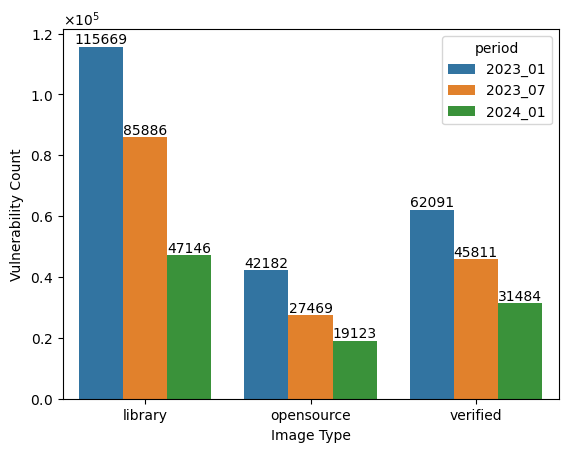

In [ ]:
# _fig, _axs = plt.subplots(1,3, figsize=(15, 5), sharey=True)
_ax1 = sns.countplot(dfnt, x="imagetype", hue="period")
# _ax1.set_title("Period 2023/01")
_ax1.set_ylabel("Vulnerability Count")
_ax1.set_xlabel("Image Type")
for _c in _ax1.containers: _ax1.bar_label(_c)
# _ax1.bar_label(_ax1.containers[0])

# Set the y-axis tick label style to scientific notation
plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

Periyod ve imaj türüne göre dağılım. Burada tüm araçlar tarafından bulunan zafiyetler birleştirilmiştir. Araçlara ayırmak için hue kullanılabilir.

[Text(0, 0, '19123'), Text(0, 0, '31484'), Text(0, 0, '47146')]

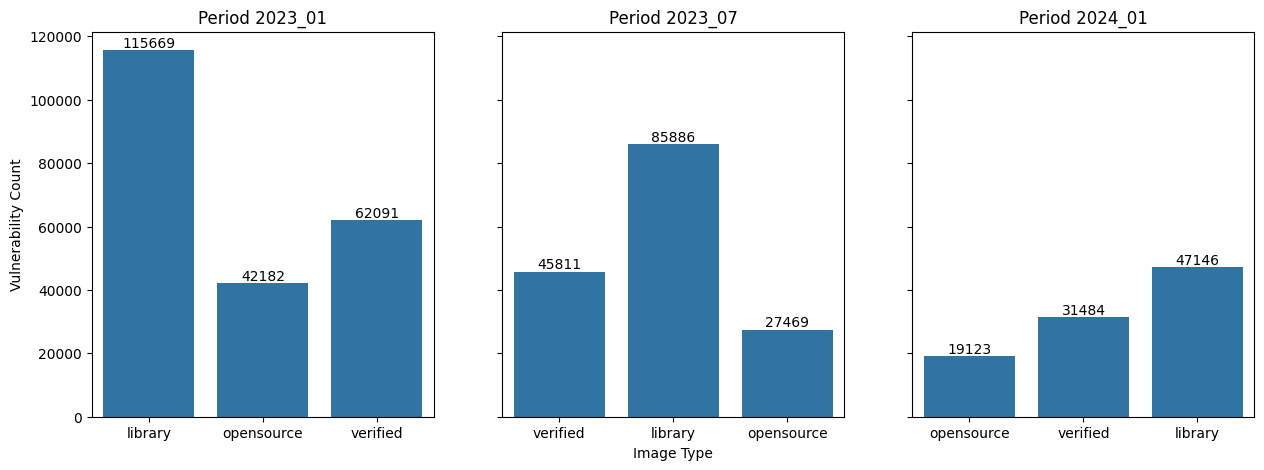

In [ ]:
# img-type-versus-periods
_fig, _axs = plt.subplots(1,3, figsize=(15, 5), sharey=True)
_ax1 = sns.countplot(p2301nt, x="imagetype", ax=_axs[0])
_ax1.set_title("Period 2023_01")
_ax1.set_ylabel("Vulnerability Count")
_ax1.set_xlabel("")
_ax1.bar_label(_ax1.containers[0])
_ax2 = sns.countplot(p2307nt, x="imagetype", ax=_axs[1])
_ax2.set_xlabel("Image Type")
_ax2.set_title("Period 2023_07")
_ax2.bar_label(_ax2.containers[0])
_ax3 = sns.countplot(p2401nt, x="imagetype", ax=_axs[2])
_ax3.set_title("Period 2024_01")
_ax3.set_xlabel("")
_ax3.bar_label(_ax3.containers[0])

Text(0.5, 1.0, 'Period 2024/01')

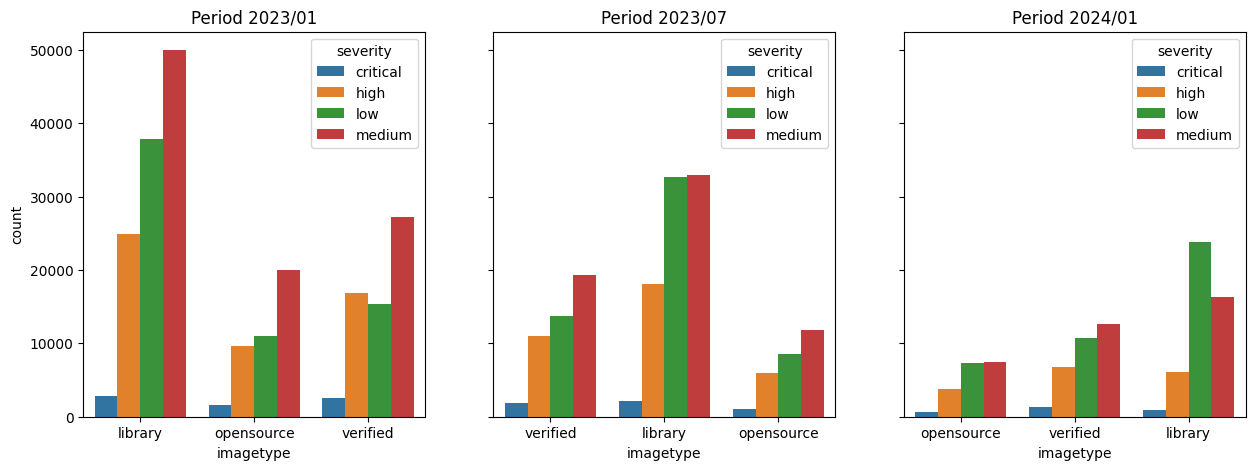

In [ ]:
# img-type-versus-periods
_fig, _axs = plt.subplots(1,3, figsize=(15, 5), sharey=True)
_ax1 = sns.countplot(p2301nt, x="imagetype", hue="severity", ax=_axs[0])
_ax1.set_title("Period 2023/01")
_ax2 = sns.countplot(p2307nt, x="imagetype", hue="severity", ax=_axs[1])
_ax2.set_title("Period 2023/07")
_ax3 = sns.countplot(p2401nt, x="imagetype", hue="severity", ax=_axs[2])
_ax3.set_title("Period 2024/01")

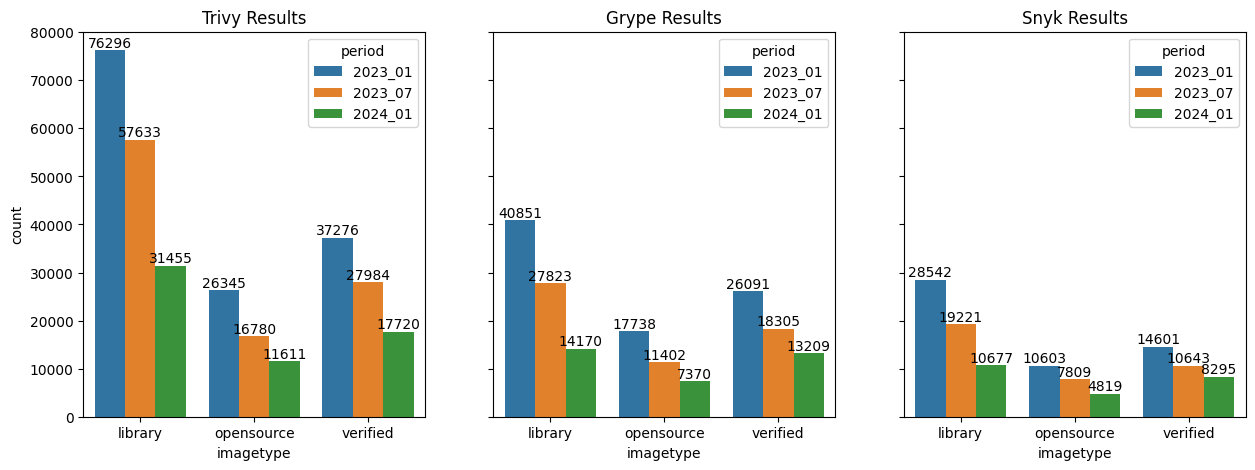

In [ ]:
#TODO:sayı FONT küçült  
_fig, _axs = plt.subplots(1,3, figsize=(15, 5), sharey=True)
_ax1 = sns.countplot(trivy_vulns, x="imagetype", hue="period", ax=_axs[0])
_ax1.set_title("Trivy Results")
for _c in _ax1.containers: _ax1.bar_label(_c)
_ax2 = sns.countplot(grype_vulns, x="imagetype", hue="period", ax=_axs[1])
_ax2.set_title("Grype Results")
for _c in _ax2.containers: _ax2.bar_label(_c)
# ax2.bar_label(ax2.containers[0])
_ax3 = sns.countplot(snyk_vulns, x="imagetype", hue="period", ax=_axs[2])
_ax3.set_title("Snyk Results")
for _c in _ax3.containers: _ax3.bar_label(_c)
# ax3.bar_label(ax3.pcontainers[0])

Zafiyet sayısının period ve araca göre yüzdesel değişimi.

In [ ]:
_p1_lib_trv, _p2_lib_trv, _p3_lib_trv = 76296, 57633, 31455
_p1_oss_trv, _p2_oss_trv, _p3_oss_trv = 26345, 16780, 11611
_p1_vrf_trv, _p2_vrf_trv, _p3_vrf_trv = 37276, 27984, 17720
print("trivy: library p1/p2", _p2_lib_trv / _p1_lib_trv * 100, "library p1/p3", _p3_lib_trv / _p1_lib_trv * 100)
print("trivy: opensource p1/p2", _p2_oss_trv / _p1_oss_trv * 100, "opensource p1/p3", _p3_oss_trv / _p1_oss_trv * 100)
print("trivy: verified p1/p2", _p2_vrf_trv / _p1_vrf_trv * 100, "verified p1/p3", _p3_vrf_trv / _p1_vrf_trv * 100)

_p1_lib_gry, _p2_lib_gry, _p3_lib_gry = 40851, 27823, 14170
_p1_oss_gry, _p2_oss_gry, _p3_oss_gry = 17738, 11402, 7370
_p1_vrf_gry, _p2_vrf_gry, _p3_vrf_gry = 26091, 18305, 13209
print("grype: library p1/p2", _p2_lib_gry / _p1_lib_gry * 100, "library p1/p3", _p3_lib_gry / _p1_lib_gry * 100)
print("grype: opensource p1/p2", _p2_oss_gry / _p1_oss_gry * 100, "opensource p1/p3", _p3_oss_gry / _p1_oss_gry * 100)
print("grype: verified p1/p2", _p2_vrf_gry / _p1_vrf_gry * 100, "verified p1/p3", _p3_vrf_gry / _p1_vrf_gry * 100)

_p1_lib_sny, _p2_lib_sny, _p3_lib_sny = 28542, 19221, 10677
_p1_oss_sny, _p2_oss_sny, _p3_oss_sny = 10603, 7809, 4819
_p1_vrf_sny, _p2_vrf_sny, _p3_vrf_sny = 14601, 10643, 8295
print("snyk: library p1/p2", _p2_lib_sny / _p1_lib_sny * 100, "library p1/p3", _p3_lib_sny / _p1_lib_sny * 100)
print("snyk: opensource p1/p2", _p2_oss_sny / _p1_oss_sny * 100, "opensource p1/p3", _p3_oss_sny / _p1_oss_sny * 100)
print("snyk: verified p1/p2", _p2_vrf_sny / _p1_vrf_sny * 100, "verified p1/p3", _p3_vrf_sny / _p1_vrf_sny * 100)

trivy: library p1/p2 75.53869141239383 library p1/p3 41.22758729160113
trivy: opensource p1/p2 63.693300436515464 opensource p1/p3 44.07287910419434
trivy: verified p1/p2 75.07243266444897 verified p1/p3 47.53728940873484
grype: library p1/p2 68.10849183618515 library p1/p3 34.6870333651563
grype: opensource p1/p2 64.28007667155259 opensource p1/p3 41.54921637163152
grype: verified p1/p2 70.1582921313863 verified p1/p3 50.62665286880533
snyk: library p1/p2 67.34286314904352 library p1/p3 37.408030271179314
snyk: opensource p1/p2 73.64896727341318 opensource p1/p3 45.44940111289258
snyk: verified p1/p2 72.89226765290049 verified p1/p3 56.81117731662215


Periyod ve şiddete göre dağılım

Text(0.5, 0, '')

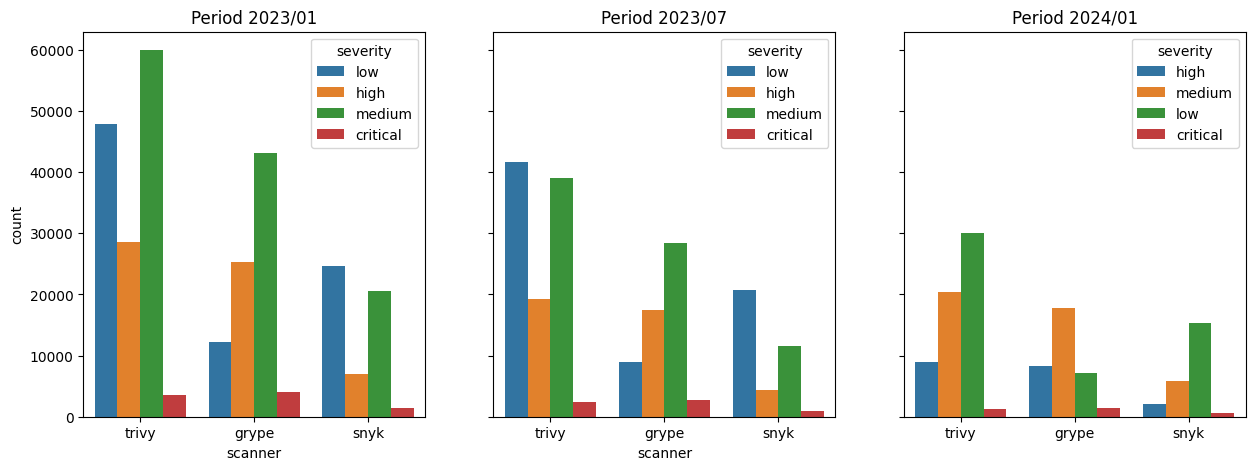

In [ ]:
_fig, _axs = plt.subplots(1,3, figsize=(15, 5), sharey=True)
_ax1 = sns.countplot(p2301, x="scanner", hue="severity", ax=_axs[0])
_ax1.set_title("Period 2023/01")
# _ax1.bar_label(_ax1.containers[0])
_ax2 = sns.countplot(p2307, x="scanner", hue="severity", ax=_axs[1])
_ax2.set_title("Period 2023/07")
# _ax2.bar_label(_ax2.containers[0])
_ax3 = sns.countplot(p2401, x="scanner", hue="severity", ax=_axs[2])
_ax3.set_title("Period 2024/01")
_ax3.set_xlabel("")
# _ax3.bar_label(_ax3.containers[0])

## Tarama Aracı İstatistikleri

Araçlar ve period bazında zafiyet şiddetine göre dağılım.

Text(0.5, 1.0, 'Snyk over periods')

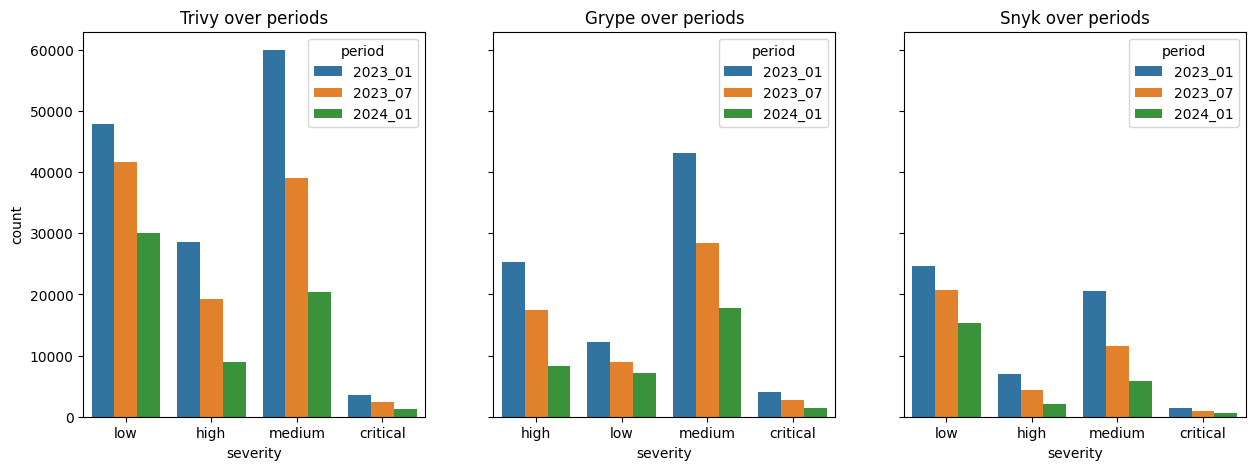

In [ ]:
_fig, _axs = plt.subplots(1,3, figsize=(15, 5), sharey=True)
_ax1 = sns.countplot(trivy_vulns, x="severity", hue="period", ax=_axs[0])
_ax1.set_title("Trivy over periods")
_ax2 = sns.countplot(grype_vulns, x="severity", hue="period", ax=_axs[1])
_ax2.set_title("Grype over periods")
_ax3 = sns.countplot(snyk_vulns, x="severity", hue="period", ax=_axs[2])
_ax3.set_title("Snyk over periods")

Araçlar tarafından bulunan uniq zafiyetlerin venn grafiği.

In [ ]:
p2301_trivy = p2301[p2301["scanner"] == "trivy"]
p2301_grype = p2301[p2301["scanner"] == "grype"]
p2301_snyk  = p2301[p2301["scanner"] == "snyk"]

p2307_trivy = p2307[p2307["scanner"] == "trivy"]
p2307_grype = p2307[p2307["scanner"] == "grype"]
p2307_snyk  = p2307[p2307["scanner"] == "snyk"]

p2401_trivy = p2401[p2401["scanner"] == "trivy"]
p2401_grype = p2401[p2401["scanner"] == "grype"]
p2401_snyk  = p2401[p2401["scanner"] == "snyk"]

Text(0.5, 1.0, 'Period 2401')

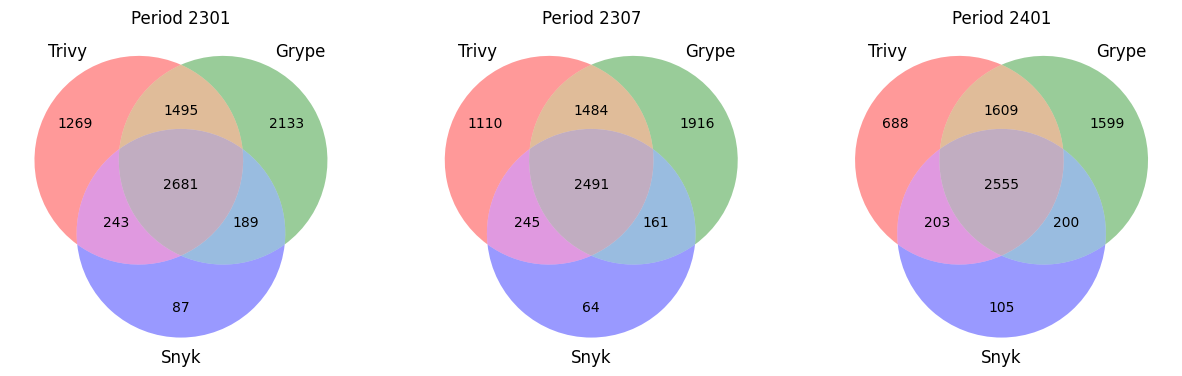

In [ ]:
_venn_vulns_p2301 = [set(p2301_trivy["id"]), set(p2301_grype["id"]), set(p2301_snyk["id"])]
_venn_vulns_p2307 = [set(p2307_trivy["id"]), set(p2307_grype["id"]), set(p2307_snyk["id"])]
_venn_vulns_p2401 = [set(p2401_trivy["id"]), set(p2401_grype["id"]), set(p2401_snyk["id"])]

_fig, (_ax1, _ax2, _ax3) = plt.subplots(1,3, figsize=(15, 5))
venn3_unweighted(_venn_vulns_p2301, ("Trivy", "Grype", "Snyk"), ax=_ax1)
_ax1.set_title("Period 2301")
venn3_unweighted(_venn_vulns_p2307, ("Trivy", "Grype", "Snyk"), ax=_ax2)
_ax2.set_title("Period 2307")
venn3_unweighted(_venn_vulns_p2401, ("Trivy", "Grype", "Snyk"), ax=_ax3)
_ax3.set_title("Period 2401")

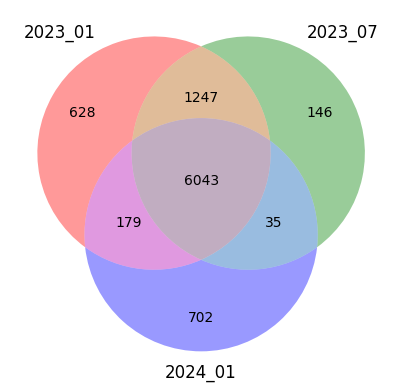

In [ ]:
_per_vuln = df[["id", "period"]].drop_duplicates()
_per_vuln_2301 = _per_vuln[_per_vuln["period"] == "2023_01"]
_per_vuln_2307 = _per_vuln[_per_vuln["period"] == "2023_07"]
_per_vuln_2401  = _per_vuln[_per_vuln["period"] == "2024_01"]
_per_vuln_ven = [set(_per_vuln_2301["id"]), set(_per_vuln_2307["id"]), set(_per_vuln_2401["id"])]
venn3_unweighted(_per_vuln_ven, ("2023_01", "2023_07", "2024_01"))

## Periyodlar arası değişimler

Kritik, yüksek ve orta zafiyetlerin periyodik değişimi.

In [ ]:
dfnt_critical = dfnt[dfnt["severity"] == "critical"]
dfnt_high = dfnt[dfnt["severity"] == "high"]
dfnt_medium = dfnt[dfnt["severity"] == "medium"]

Kritik, Yüksek ve Orta zafiyetlerin periyodik olarak yüzdesel değişimi.

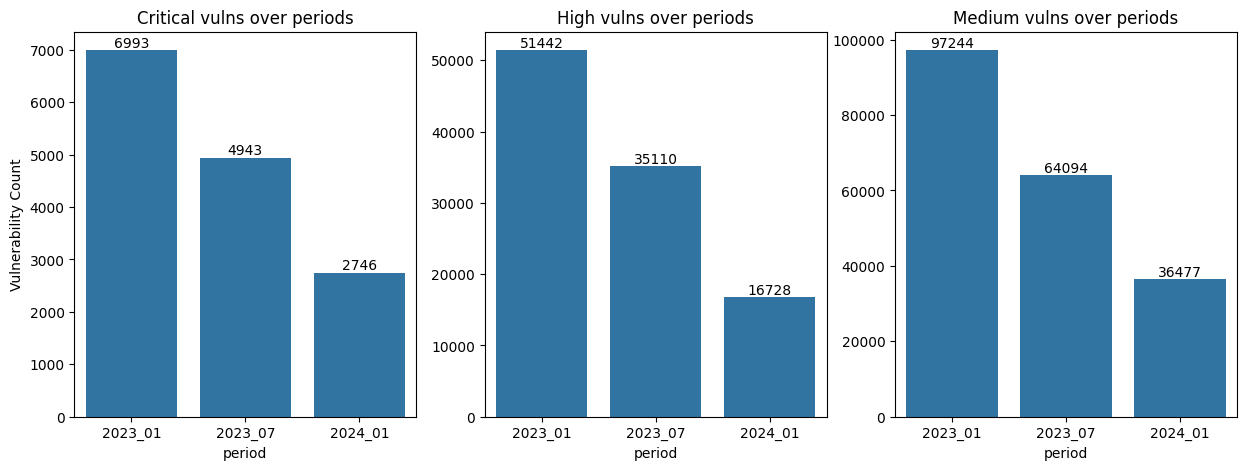

In [ ]:
_fig, _axs = plt.subplots(1,3, figsize=(15, 5))
_ax1 = sns.countplot(dfnt_critical, x="period", ax=_axs[0])
_ax1.set_title("Critical vulns over periods")
_ax1.set_ylabel("Vulnerability Count")
# _ax1.set_ylabel("")
_1 = _ax1.bar_label(_ax1.containers[0])
_ax2 = sns.countplot(dfnt_high, x="period", ax=_axs[1])
_ax2.set_title("High vulns over periods")
_ax2.set_ylabel("")
_2 = _ax2.bar_label(_ax2.containers[0])
_ax3 = sns.countplot(dfnt_medium, x="period", ax=_axs[2])
_ax3.set_title("Medium vulns over periods")
_ax3.set_ylabel("")
_3 = _ax3.bar_label(_ax3.containers[0])
#print(_1, _2, _3)

# Set the y-axis tick label style to scientific notation
# plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
# plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

In [ ]:
# Ktirik zafiyetlrin periyodik değişimi yüzde
# _critical_p1, _critical_p2, _critical_p3 = 8899, 6050, 3265
# _high_p1, _high_p2, _high_p3 = 60972, 41005, 19368
# _medium_p1, _medium_p2, _medium_p3 = 123772, 79186, 43996
# print("critical: p1/p2", _critical_p2 / _critical_p1 * 100, "p1/p3", _critical_p3 / _critical_p1 * 100)
# print("high: p1/p2", _high_p2 / _high_p1 * 100, "p1/p3", _high_p3 / _high_p1 * 100)
# print("medium: p1/p2", _medium_p2 / _medium_p1 * 100, "p1/p3", _medium_p3 / _medium_p1 * 100)

print("citical:", 6050/8899*100, 3265/8899*100)
print("high:", 41005/60972*100, 19367/60972*100)
print("medium:", 79186/123772*100, 43996/123772*100)

citical: 67.98516687268233 36.68951567591864
high: 67.25218132913469 31.76376041461654
medium: 63.97731312413146 35.546003942733414


In [ ]:
dfnt_library = dfnt[dfnt["imagetype"] == "library"]
dfnt_opensource = dfnt[dfnt["imagetype"] == "opensource"]
dfnt_verified = dfnt[dfnt["imagetype"] == "verified"]

Text(0, 0.5, '')

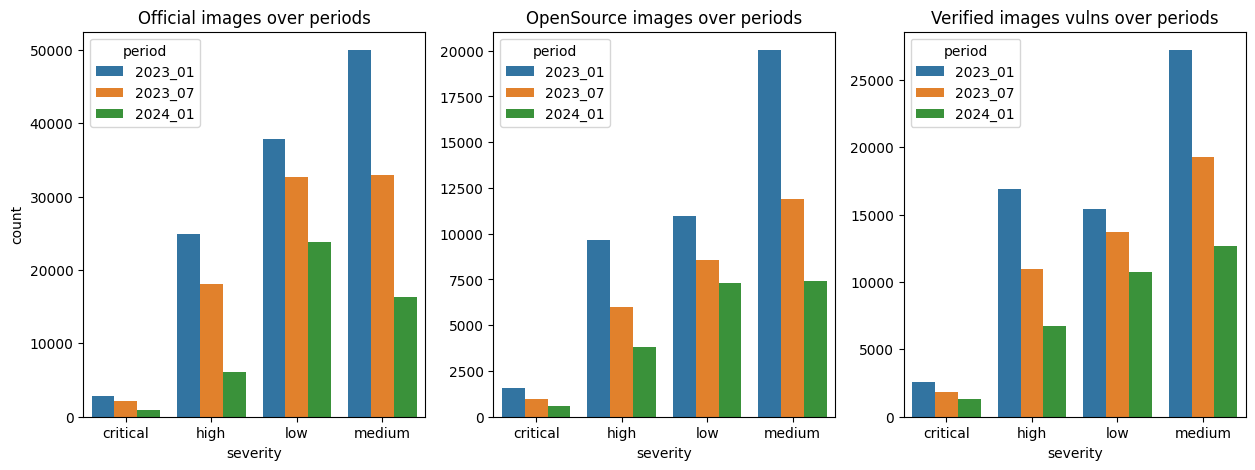

In [ ]:
_fig, _axs = plt.subplots(1,3, figsize=(15, 5))
_ax1 = sns.countplot(dfnt_library, x="severity", hue="period", ax=_axs[0])
_ax1.set_title("Official images over periods")
_ax2 = sns.countplot(dfnt_opensource, x="severity", hue="period", ax=_axs[1])
_ax2.set_title("OpenSource images over periods")
_ax2.set_ylabel("")
_ax3 = sns.countplot(dfnt_verified, x="severity", hue="period", ax=_axs[2])
_ax3.set_title("Verified images vulns over periods")
_ax3.set_ylabel("")

Text(0.5, 1.0, 'Snyk over periods')

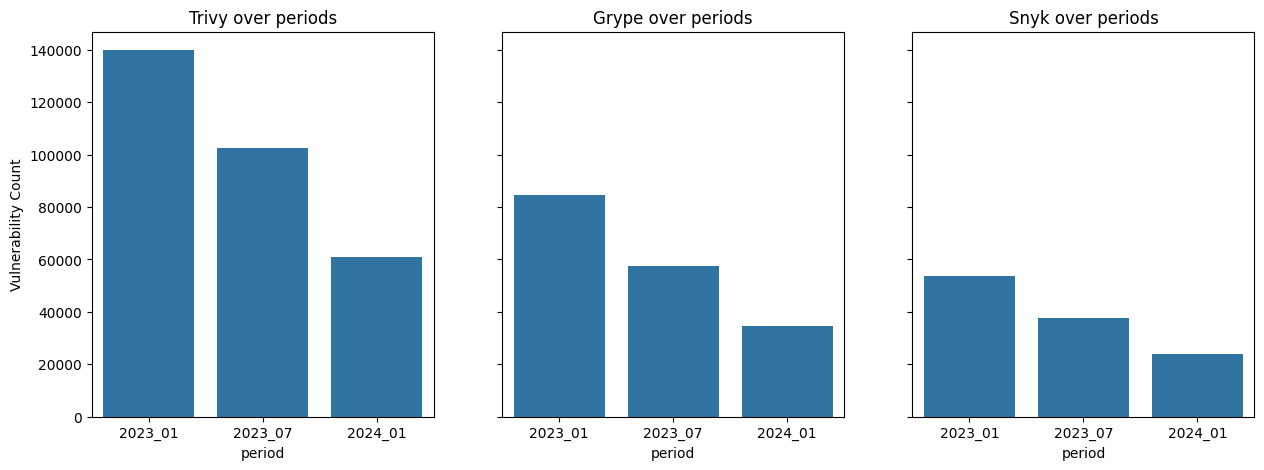

In [ ]:
_fig, _axs = plt.subplots(1,3, figsize=(15, 5), sharey=True)
_ax1 = sns.countplot(trivy_vulns, x="period", ax=_axs[0])
_ax1.set_title("Trivy over periods")
_ax1.set_ylabel("Vulnerability Count")
_ax2 = sns.countplot(grype_vulns, x="period", ax=_axs[1])
_ax2.set_title("Grype over periods")
_ax3 = sns.countplot(snyk_vulns, x="period", ax=_axs[2])
_ax3.set_title("Snyk over periods")

## Fix Status

Zafiyetlerin düzeltilme durumuna göre dağılım.

NOTE: snyk wont-fix durumunu datasında vermiyor!

Text(0.5, 1.0, 'Snyk over periods')

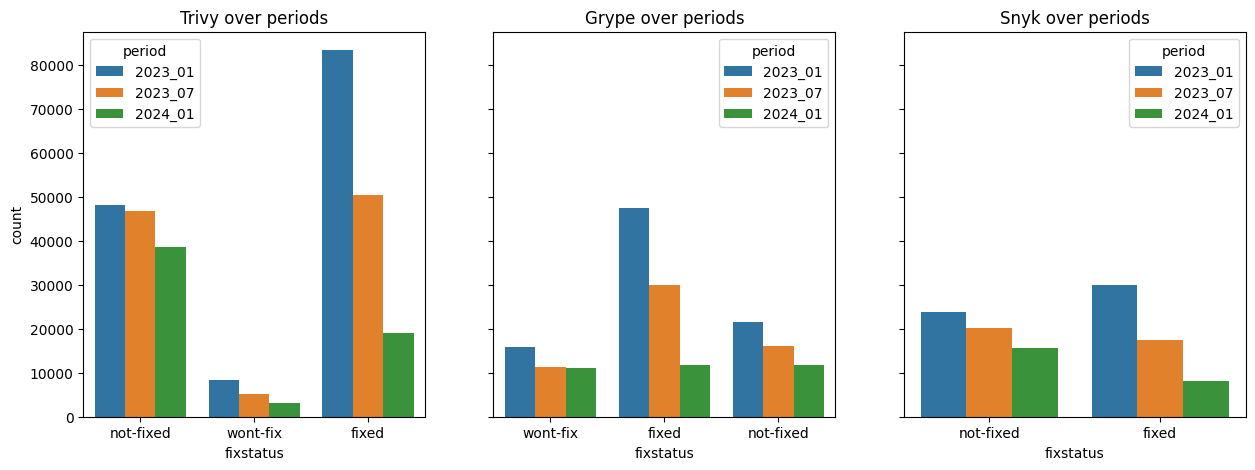

In [ ]:
_fig, _axs = plt.subplots(1,3, figsize=(15, 5), sharey=True)
_ax1 = sns.countplot(trivy_vulns, x="fixstatus", hue="period", ax=_axs[0])
_ax1.set_title("Trivy over periods")
_ax2 = sns.countplot(grype_vulns, x="fixstatus", hue="period", ax=_axs[1])
_ax2.set_title("Grype over periods")
_ax3 = sns.countplot(snyk_vulns, x="fixstatus", hue="period", ax=_axs[2])
_ax3.set_title("Snyk over periods")

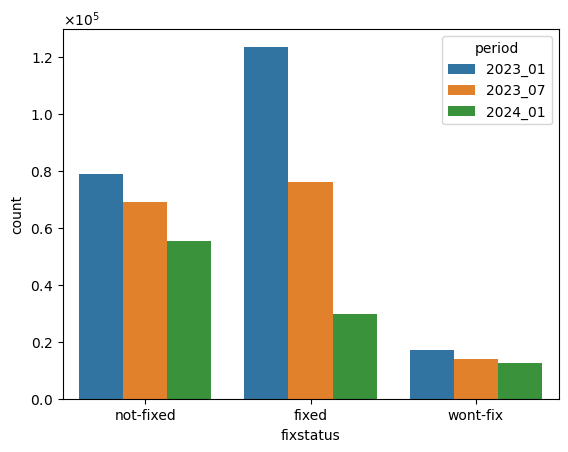

In [ ]:
sns.countplot(dfnt, x="fixstatus", hue="period", hue_order=["2023_01", "2023_07", "2024_01"])

# Set the y-axis tick label style to scientific notation
plt.gca().yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

<Axes: xlabel='fixstatus', ylabel='count'>

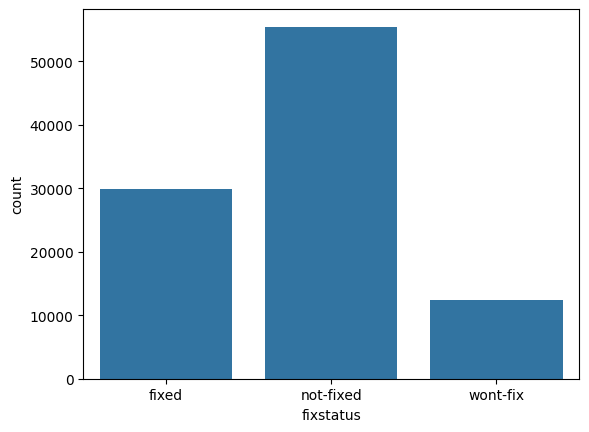

In [ ]:
sns.countplot(p2401nt, x="fixstatus")


## OS Images

In [ ]:
oss = [
    "library/alpine", "library/ubuntu", "library/centos", "library/debian", "library/oraclelinux",
    "library/rockylinux", "library/photon", "library/alt", "library/archlinux", "library/amazonlinux"
]
os_px = dfnt[dfnt.image.str.startswith(tuple(oss))]
os_2301 = p2301nt[p2301nt.image.str.startswith(tuple(oss))]
os_2307 = p2307nt[p2307nt.image.str.startswith(tuple(oss))]
os_2401 = p2401nt[p2401nt.image.str.startswith(tuple(oss))]

OS imajlarının araçlara göre dağılımı

Text(0.5, 1.0, 'Snyk over periods')

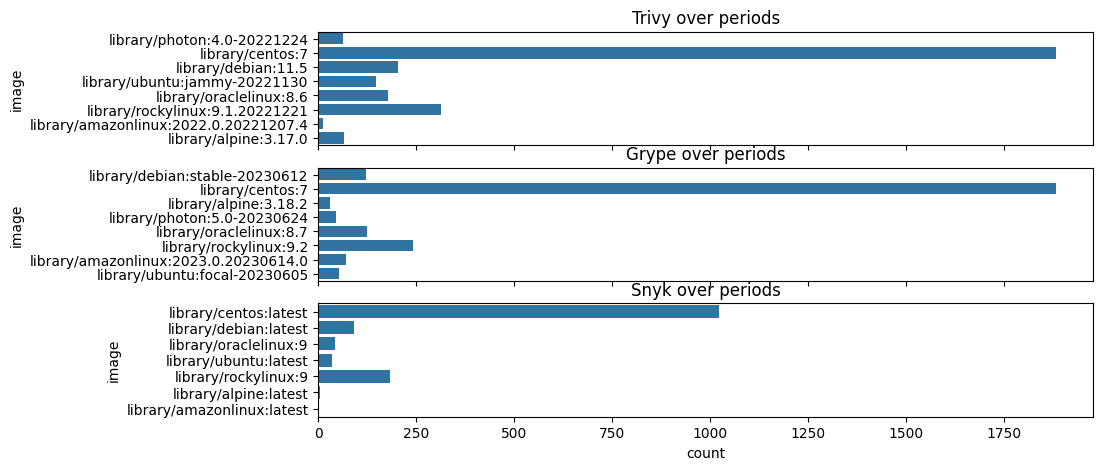

In [ ]:
_fig, _axs = plt.subplots(3,1, figsize=(10, 5), sharex=True)
_ax1 = sns.countplot(os_2301, y="image", ax=_axs[0])
_ax1.set_title("Trivy over periods")
_ax2 = sns.countplot(os_2307, y="image", ax=_axs[1])
_ax2.set_title("Grype over periods")
_ax3 = sns.countplot(os_2401, y="image", ax=_axs[2])
_ax3.set_title("Snyk over periods")

OS imajlarının periyod bazlı dağılımı. Tarama aracı bağımsız.

Text(0, 0.5, '')

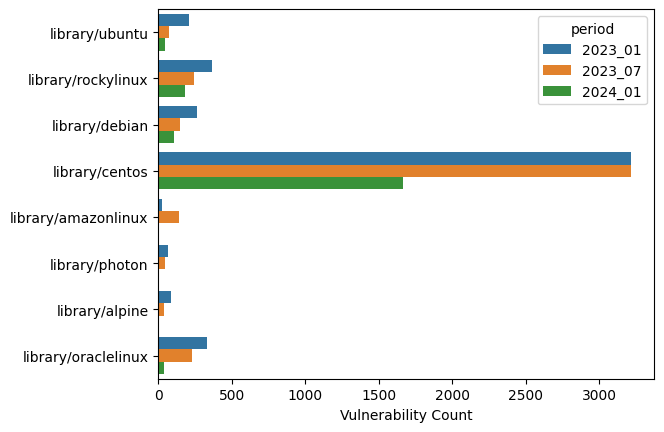

In [ ]:
osimgs = df[df.imgname.isin(oss)]
_ax = sns.countplot(osimgs, y="imgname", hue="period")
_ax.set_xlabel("Vulnerability Count")
_ax.set_ylabel("")
# sns.countplot(osimgs[osimgs["scanner"]=="trivy"], y="imgname", hue="period")
# sns.countplot(osimgs[osimgs["scanner"]=="trivy"], y="imgname", hue="period")
# sns.countplot(osimgs[osimgs["scanner"]=="grype"], y="imgname", hue="period")
# sns.countplot(osimgs[osimgs["scanner"]=="snyk"], y="imgname", hue="period")

In [ ]:
_osimgs = osimgs.groupby(["imgname", "period"]).size().reset_index(name="Count")
pivot_df = _osimgs.pivot(index='imgname', columns='period', values='Count')
pivot_df = pivot_df[["2023_01", "2023_07", "2024_01"]].fillna(0.0).astype(int).reset_index()
pivot_df#[["imgname", "2023_01", "2023_07", "2024_01"]]
print(pivot_df.to_latex())

\begin{tabular}{llrrr}
\toprule
period & imgname & 2023_01 & 2023_07 & 2024_01 \\
\midrule
0 & library/alpine & 87 & 40 & 4 \\
1 & library/amazonlinux & 26 & 141 & 6 \\
2 & library/centos & 3213 & 3213 & 1667 \\
3 & library/debian & 262 & 149 & 104 \\
4 & library/oraclelinux & 332 & 228 & 42 \\
5 & library/photon & 64 & 46 & 0 \\
6 & library/rockylinux & 363 & 245 & 182 \\
7 & library/ubuntu & 206 & 72 & 46 \\
\bottomrule
\end{tabular}



## Prog Lang

In [ ]:
proglangs = [
    "library/golang", "library/ruby", "library/perl", "library/openjdk", "library/rust",
    "library/python", "library/node", "library/erlang", "library/haskell", "library/swift",
    "library/julia", "library/php", "library/dart", "library/elixir"
]
proglangs_px = dfnt[dfnt.image.str.startswith(tuple(oss))]
proglangs_2301 = p2301nt[p2301nt.image.str.startswith(tuple(oss))]
proglangs_2307 = p2307nt[p2307nt.image.str.startswith(tuple(oss))]
proglangs_2401 = p2401nt[p2401nt.image.str.startswith(tuple(oss))]

Text(0, 0.5, '')

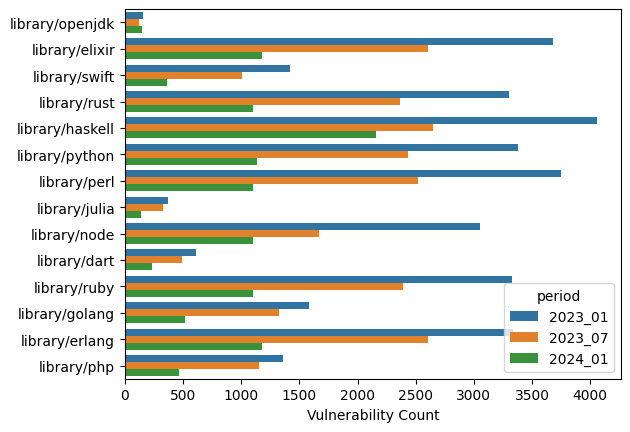

In [ ]:
proglangimgs = df[df.imgname.isin(proglangs)]
_ax = sns.countplot(proglangimgs, y="imgname", hue="period")
_ax.set_xlabel("Vulnerability Count")
_ax.set_ylabel("")
# _ax.bar_label(_ax.containers[0])
# for _c in _ax.containers:
#     tff = _ax.bar_label(_c)
#     print(type(tff))